In [1]:
# Import the dependencies

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# Create a set of random latitude and longitude combinations

lats = np.random.uniform(low = -90.000, high = 90.000, size = 1500)
lngs = np.random.uniform(low = -180.000, high = 180.000, size = 1500)

lat_lngs = zip(lats, lngs)
lat_lngs

In [3]:
# Add the latitudes and longitudes to a list

coordinates = list(lat_lngs)

In [5]:
from citipy import citipy

In [6]:
# Create a list for holding cities

cities = []

# Identify the nearest city for each latitude and longitude combination

for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name
    
    # If the city is unique, then we will add it to the cities list
    
    if city not in cities:
        cities.append(city)
        
# Print the city count to confirm sufficient count

len(cities)

602

In [7]:
# Import the time library and the datetime module from the datetime library

import time
from datetime import datetime

In [9]:
# import the requests library

import requests

# import API key

from config import weather_api_key

In [10]:
# Starting URL for Weather Map API Call.

url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key

In [11]:
# Create the empty list to hold the weather data

city_data = []

# Print the beginning of the logging

print('Beginning Data Retrieval    ')
print('----------------------------')

# Create counters

record_count = 1
set_count = 1

# Loop through all the cities in our list

for i, city in enumerate(cities):
    
    # Group cities in sets of 50 for logging purposes
    
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
        time.sleep(60)
        
    # Create endpoint URL with each city
    
    city_url = url + "&q=" + city.replace(" ","+")
    
    # Log the URL, record, and set numbers and the city
    
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    
    # Add 1 to the record count
    
    record_count += 1
    
# Run an API request for each of the cities.

    try:
        
        # Parse the JSON and retrieve data.
        
        city_weather = requests.get(city_url).json()
        
        # Parse out the needed data.
        
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        
        # Convert the date to ISO standard.
        
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        
        # Append the city information into city_data list.
        
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.

    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.

print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval    
----------------------------
Processing Record 1 of Set 1 | mataura
Processing Record 2 of Set 1 | lorengau
Processing Record 3 of Set 1 | iraray
Processing Record 4 of Set 1 | iralaya
Processing Record 5 of Set 1 | new norfolk
Processing Record 6 of Set 1 | tarhunah
City not found. Skipping...
Processing Record 7 of Set 1 | nizhneyansk
City not found. Skipping...
Processing Record 8 of Set 1 | sakakah
Processing Record 9 of Set 1 | leningradskiy
Processing Record 10 of Set 1 | rikitea
Processing Record 11 of Set 1 | kapaa
Processing Record 12 of Set 1 | airai
Processing Record 13 of Set 1 | hermanus
Processing Record 14 of Set 1 | norman wells
Processing Record 15 of Set 1 | sorvag
City not found. Skipping...
Processing Record 16 of Set 1 | khatanga
Processing Record 17 of Set 1 | tura
Processing Record 18 of Set 1 | vaitupu
City not found. Skipping...
Processing Record 19 of Set 1 | camapua
Processing Record 20 of Set 1 | upernavik
Processing Record 21 of

Processing Record 41 of Set 4 | batticaloa
Processing Record 42 of Set 4 | baie-comeau
Processing Record 43 of Set 4 | hasaki
Processing Record 44 of Set 4 | lagoa
Processing Record 45 of Set 4 | san ramon
Processing Record 46 of Set 4 | alofi
Processing Record 47 of Set 4 | portland
Processing Record 48 of Set 4 | santa fe
Processing Record 49 of Set 4 | faanui
Processing Record 50 of Set 4 | camana
Processing Record 1 of Set 5 | salalah
Processing Record 2 of Set 5 | mujiayingzi
Processing Record 3 of Set 5 | jaguey grande
Processing Record 4 of Set 5 | imelda
Processing Record 5 of Set 5 | trelew
Processing Record 6 of Set 5 | jiddah
City not found. Skipping...
Processing Record 7 of Set 5 | port elizabeth
Processing Record 8 of Set 5 | fairbanks
Processing Record 9 of Set 5 | barranca
Processing Record 10 of Set 5 | sinnamary
Processing Record 11 of Set 5 | karaton
Processing Record 12 of Set 5 | amderma
City not found. Skipping...
Processing Record 13 of Set 5 | victoria
Processin

Processing Record 30 of Set 8 | caravelas
Processing Record 31 of Set 8 | poum
Processing Record 32 of Set 8 | ballina
Processing Record 33 of Set 8 | sioux lookout
Processing Record 34 of Set 8 | jinchengjiang
City not found. Skipping...
Processing Record 35 of Set 8 | khonuu
City not found. Skipping...
Processing Record 36 of Set 8 | mrirt
City not found. Skipping...
Processing Record 37 of Set 8 | ustka
Processing Record 38 of Set 8 | djambala
Processing Record 39 of Set 8 | teahupoo
Processing Record 40 of Set 8 | puro
Processing Record 41 of Set 8 | noumea
Processing Record 42 of Set 8 | neiafu
Processing Record 43 of Set 8 | fortuna
Processing Record 44 of Set 8 | hot springs
Processing Record 45 of Set 8 | jaisalmer
Processing Record 46 of Set 8 | healdsburg
Processing Record 47 of Set 8 | tamboril
Processing Record 48 of Set 8 | linqing
Processing Record 49 of Set 8 | denison
Processing Record 50 of Set 8 | nepomuceno
Processing Record 1 of Set 9 | galesong
Processing Record 2 

Processing Record 14 of Set 12 | ewa beach
Processing Record 15 of Set 12 | mount isa
Processing Record 16 of Set 12 | hendek
Processing Record 17 of Set 12 | vestmannaeyjar
Processing Record 18 of Set 12 | katesh
Processing Record 19 of Set 12 | san miguel
Processing Record 20 of Set 12 | nemuro
Processing Record 21 of Set 12 | roebourne
Processing Record 22 of Set 12 | casablanca
Processing Record 23 of Set 12 | weihe
Processing Record 24 of Set 12 | xiaoshi
Processing Record 25 of Set 12 | puerto carreno
Processing Record 26 of Set 12 | kyren
Processing Record 27 of Set 12 | vicuna
Processing Record 28 of Set 12 | waterloo
Processing Record 29 of Set 12 | naryan-mar
Processing Record 30 of Set 12 | bandarbeyla
Processing Record 31 of Set 12 | lingsugur
Processing Record 32 of Set 12 | bac can
City not found. Skipping...
Processing Record 33 of Set 12 | florida
Processing Record 34 of Set 12 | nishihara
Processing Record 35 of Set 12 | port moresby
Processing Record 36 of Set 12 | ta

In [12]:
# Convert the array of dictionaries to a Pandas DataFrame

city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Mataura,-46.1927,168.8643,59.49,91,29,1.48,NZ,2022-01-31 19:21:05
1,Lorengau,-2.0226,147.2712,78.21,90,100,14.43,PG,2022-01-31 19:21:06
2,Iraray,8.9936,118.0511,77.85,87,23,7.49,PH,2022-01-31 19:21:06
3,Iralaya,15.0000,-83.2333,84.29,60,64,12.59,HN,2022-01-31 19:21:07
4,New Norfolk,-42.7826,147.0587,68.76,75,5,2.21,AU,2022-01-31 19:21:07
5,Sakakah,29.9697,40.2064,53.17,47,0,12.91,SA,2022-01-31 19:21:08
6,Leningradskiy,69.3833,178.4167,-18.74,94,28,7.83,RU,2022-01-31 19:21:08
7,Rikitea,-23.1203,-134.9692,77.27,65,100,4.34,PF,2022-01-31 19:18:30
8,Kapaa,22.0752,-159.3190,75.18,79,0,8.05,US,2022-01-31 19:21:09
9,Airai,-8.9266,125.4092,60.04,88,98,4.59,TL,2022-01-31 19:21:09


In [13]:
# Reorder columns

new_column_order = ["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]

city_data_df = city_data_df[new_column_order]

city_data_df.head(10)

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Mataura,NZ,2022-01-31 19:21:05,-46.1927,168.8643,59.49,91,29,1.48
1,Lorengau,PG,2022-01-31 19:21:06,-2.0226,147.2712,78.21,90,100,14.43
2,Iraray,PH,2022-01-31 19:21:06,8.9936,118.0511,77.85,87,23,7.49
3,Iralaya,HN,2022-01-31 19:21:07,15.0000,-83.2333,84.29,60,64,12.59
4,New Norfolk,AU,2022-01-31 19:21:07,-42.7826,147.0587,68.76,75,5,2.21
5,Sakakah,SA,2022-01-31 19:21:08,29.9697,40.2064,53.17,47,0,12.91
6,Leningradskiy,RU,2022-01-31 19:21:08,69.3833,178.4167,-18.74,94,28,7.83
7,Rikitea,PF,2022-01-31 19:18:30,-23.1203,-134.9692,77.27,65,100,4.34
8,Kapaa,US,2022-01-31 19:21:09,22.0752,-159.3190,75.18,79,0,8.05
9,Airai,TL,2022-01-31 19:21:09,-8.9266,125.4092,60.04,88,98,4.59


In [14]:
# Create output file (CSV)

output_data_file = "weather_data/cities.csv"

# Export the city_data into a CSV

city_data_df.to_csv(output_data_file, index_label = "City_ID")

In [15]:
# Extract relevant fields from the DataFrame for plotting

lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

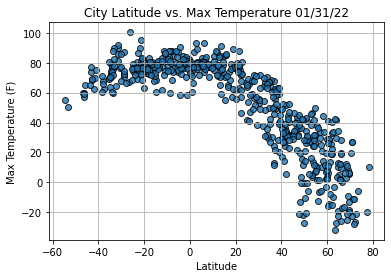

In [16]:
# Import time module

import time

# Build a scatter plot for latitude vs max temperature

plt.scatter(lats,
            max_temps,
            edgecolor = "black",
            linewidths = 1,
            marker = "o",
            alpha = 0.8,
            label = "Cities")

# Incorporate the other graph properties

plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure

plt.savefig("weather_data/Fig1.png")

plt.show()

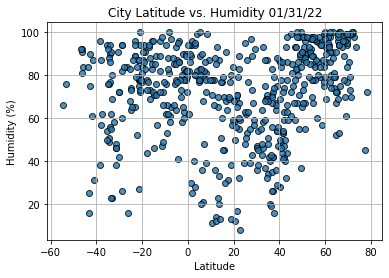

In [21]:
# Build a scatter plot for latitude vs humidity

plt.scatter(lats,
            humidity,
            edgecolor = "black",
            linewidths = 1,
            marker = "o",
            alpha = 0.8,
            label = "Cities")

# Incorporate the other graph properties

plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure

plt.savefig("weather_data/Fig2.png")

plt.show()

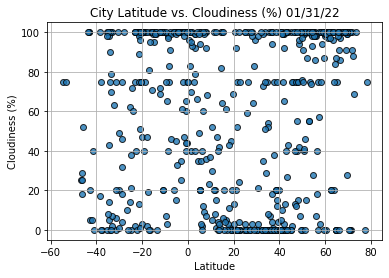

In [22]:
# Build a scatter plot for latitude vs cloudiness

plt.scatter(lats,
            cloudiness,
            edgecolor = "black",
            linewidths = 1,
            marker = "o",
            alpha = 0.8,
            label = "Cities")

# Incorporate the other graph properties

plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure

plt.savefig("weather_data/Fig3.png")

plt.show()

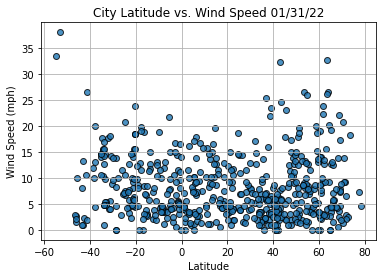

In [23]:
# Build a scatter plot for latitude vs wind speed

plt.scatter(lats,
            wind_speed,
            edgecolor = "black",
            linewidths = 1,
            marker = "o",
            alpha = 0.8,
            label = "Cities")

# Incorporate the other graph properties

plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure

plt.savefig("weather_data/Fig4.png")

plt.show()